# My Jupyter Notebook Covering Exercises From Topic One Of The Machine Learning Module (Data Analytics)

### <i>Q: Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.<i/>

In [1]:
# This has been adapted from Machine Learning & Statistics lecture. 
# The eight cups.
cups = list(range(8))
cups

[0, 1, 2, 3, 4, 5, 6, 7]

In [2]:
(8*7*6*5)/(4*3*2*1)

70.0

In [ ]:
import itertools

poss = list(itertools.combinations(cups, 4))
poss

In [7]:
import math

In [8]:
math.comb(8, 4)

70

In [9]:
# This outputs a 1.4% chance of selecting the correct cups.
1/(math.comb(8, 4))

0.014285714285714285

In [10]:
# Outputs about half of a percent.
1/(math.comb(10, 4))

0.004761904761904762

In [19]:
# 9 cups of tea gives under one percent whereas 8 outputs over one percent; so the answer is 9 cups of tea. 
1/(math.comb(9, 4))

0.007936507936507936

In [20]:
1/(math.comb(8, 4))

0.014285714285714285

### <i>Q: How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?<i/>

In [4]:
#Theres is roughly a 20% chance of guessing at least 3 cups correct.
import math
1/(math.comb(7, 3))

0.02857142857142857

In [15]:
import itertools
cups = [0, 1, 2, 3, 4, 5, 6, 7]
poss = list(itertools.combinations(cups, 3))

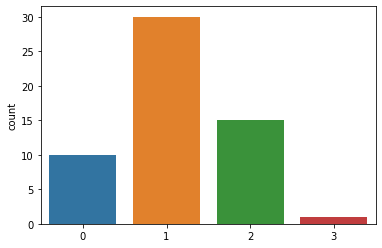

In [16]:
import random
import seaborn as sns

# Pick a random correct answer from the list of 70 to simulate the experiment.
milkfirst = set(random.choice(poss))

# Count the overlap between the correct answer, and each of the 70 possiblities.
counts = [len(milkfirst & set(i)) for i in itertools.combinations(cups, 3)]

# Creat the plot.
sns.countplot(x=counts)

### <i>Q: Use scipy's version of Fisher's exact test to simulate the Lady Tasting Tea problem.<i/>

In [1]:
from scipy.stats import fisher_exact
oddsratio, pvalue = fisher_exact([[4, 0], [0, 4]])
pvalue

0.028571428571428536

The 'oddsratio' outputted from Fisher's exact test usually works on nominal variables with exactly two levels or categories. Nominal variables are usually qualitative, that is can't be assigned a numerical value but they can also be coded with numerical values, but the order is arbitary. The oddsratio compares the of positive occurances with the number of negatives occurances.<br>
<br> Formula: oddsratio, OR = $(a / c)$ / $(b / d)$ <br>
<br> An oddsratio of less than one means negative occurances were more common than positive occurances. An oddsratio equal to one means there is no relation between the variables in question. An oddsratio greater than one means positive cases were more common that negative cases. For example, an oddsration greater than one would mean a higher proportion of the results were as expected than the contrary. 
The 'p-value', the probability value, can be used to determine if you are rejecting the Null Hypothesis. It tells you how often you would expect to see a statistic from a test as or more extreme than the one calculated during your test if the Null Hypothesis of that test was true. 

In [2]:
from scipy.stats import fisher_exact
oddsratio, pvalue = fisher_exact([[3, 1], [1, 3]])
pvalue

0.48571428571428527

In [3]:
#As expected, the probability of her getting all correct is the same as getting all wrong:
from scipy.stats import fisher_exact
oddsratio, pvalue = fisher_exact([[0, 4], [4, 0]])
pvalue

0.028571428571428536

In [4]:
from scipy.stats import fisher_exact
oddsratio, pvalue = fisher_exact([[2, 2], [2, 2]])
pvalue

1.0

In [8]:
import numpy as np
from scipy.stats import hypergeom
table = np.array([[4, 0], [0, 4]])
M = table.sum()
n = table[0].sum()
N = table[:, 0].sum()
start, end = hypergeom.support(M, n, N)
hypergeom.pmf(np.arange(start, end+1), M, n, N)

array([0.01428571, 0.22857143, 0.51428571, 0.22857143, 0.01428571])

At least 3 out of 4 correct guesses has a probability of 24%, which is greater than 5%. The only time the Null Hypothesis could be rejected was when she correctly guessed all 4 (0.014 = 1.4% which is < 5%).
0.014 = 1/70, 0.2286 = 16/70. Adding these we get 17/70 = 0.24286